<a href="https://colab.research.google.com/github/joysosanya/BREAST_CANCER_PREDICTION/blob/main/BREAST_CANCER_PREDICTION(TUMOUR_BASIS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

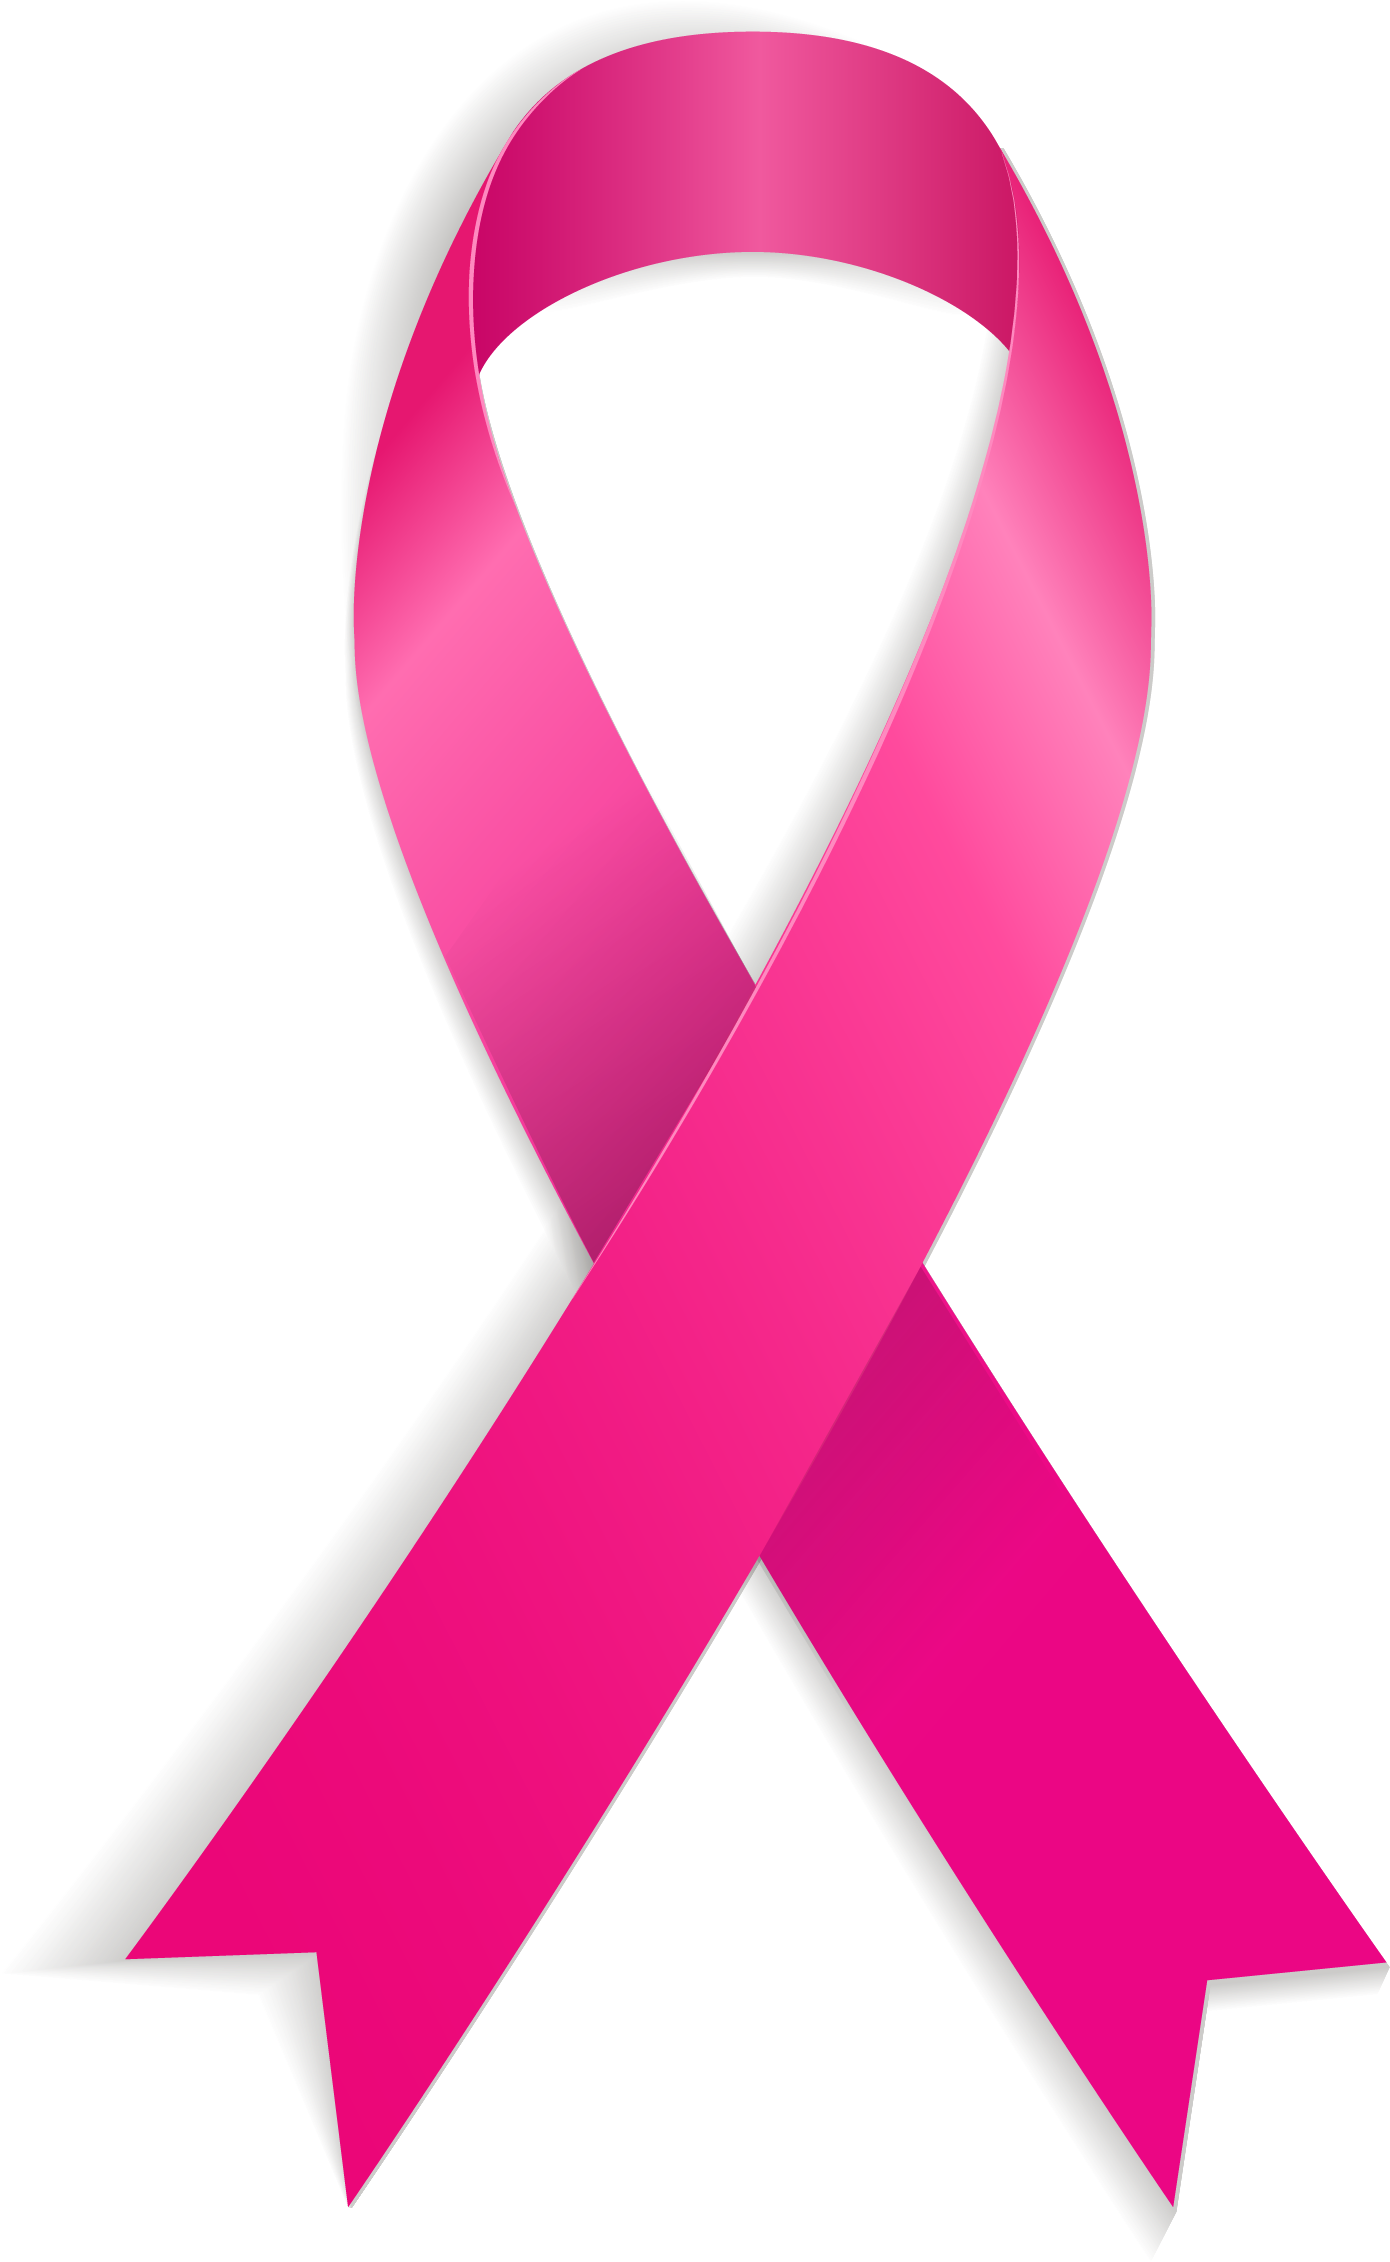

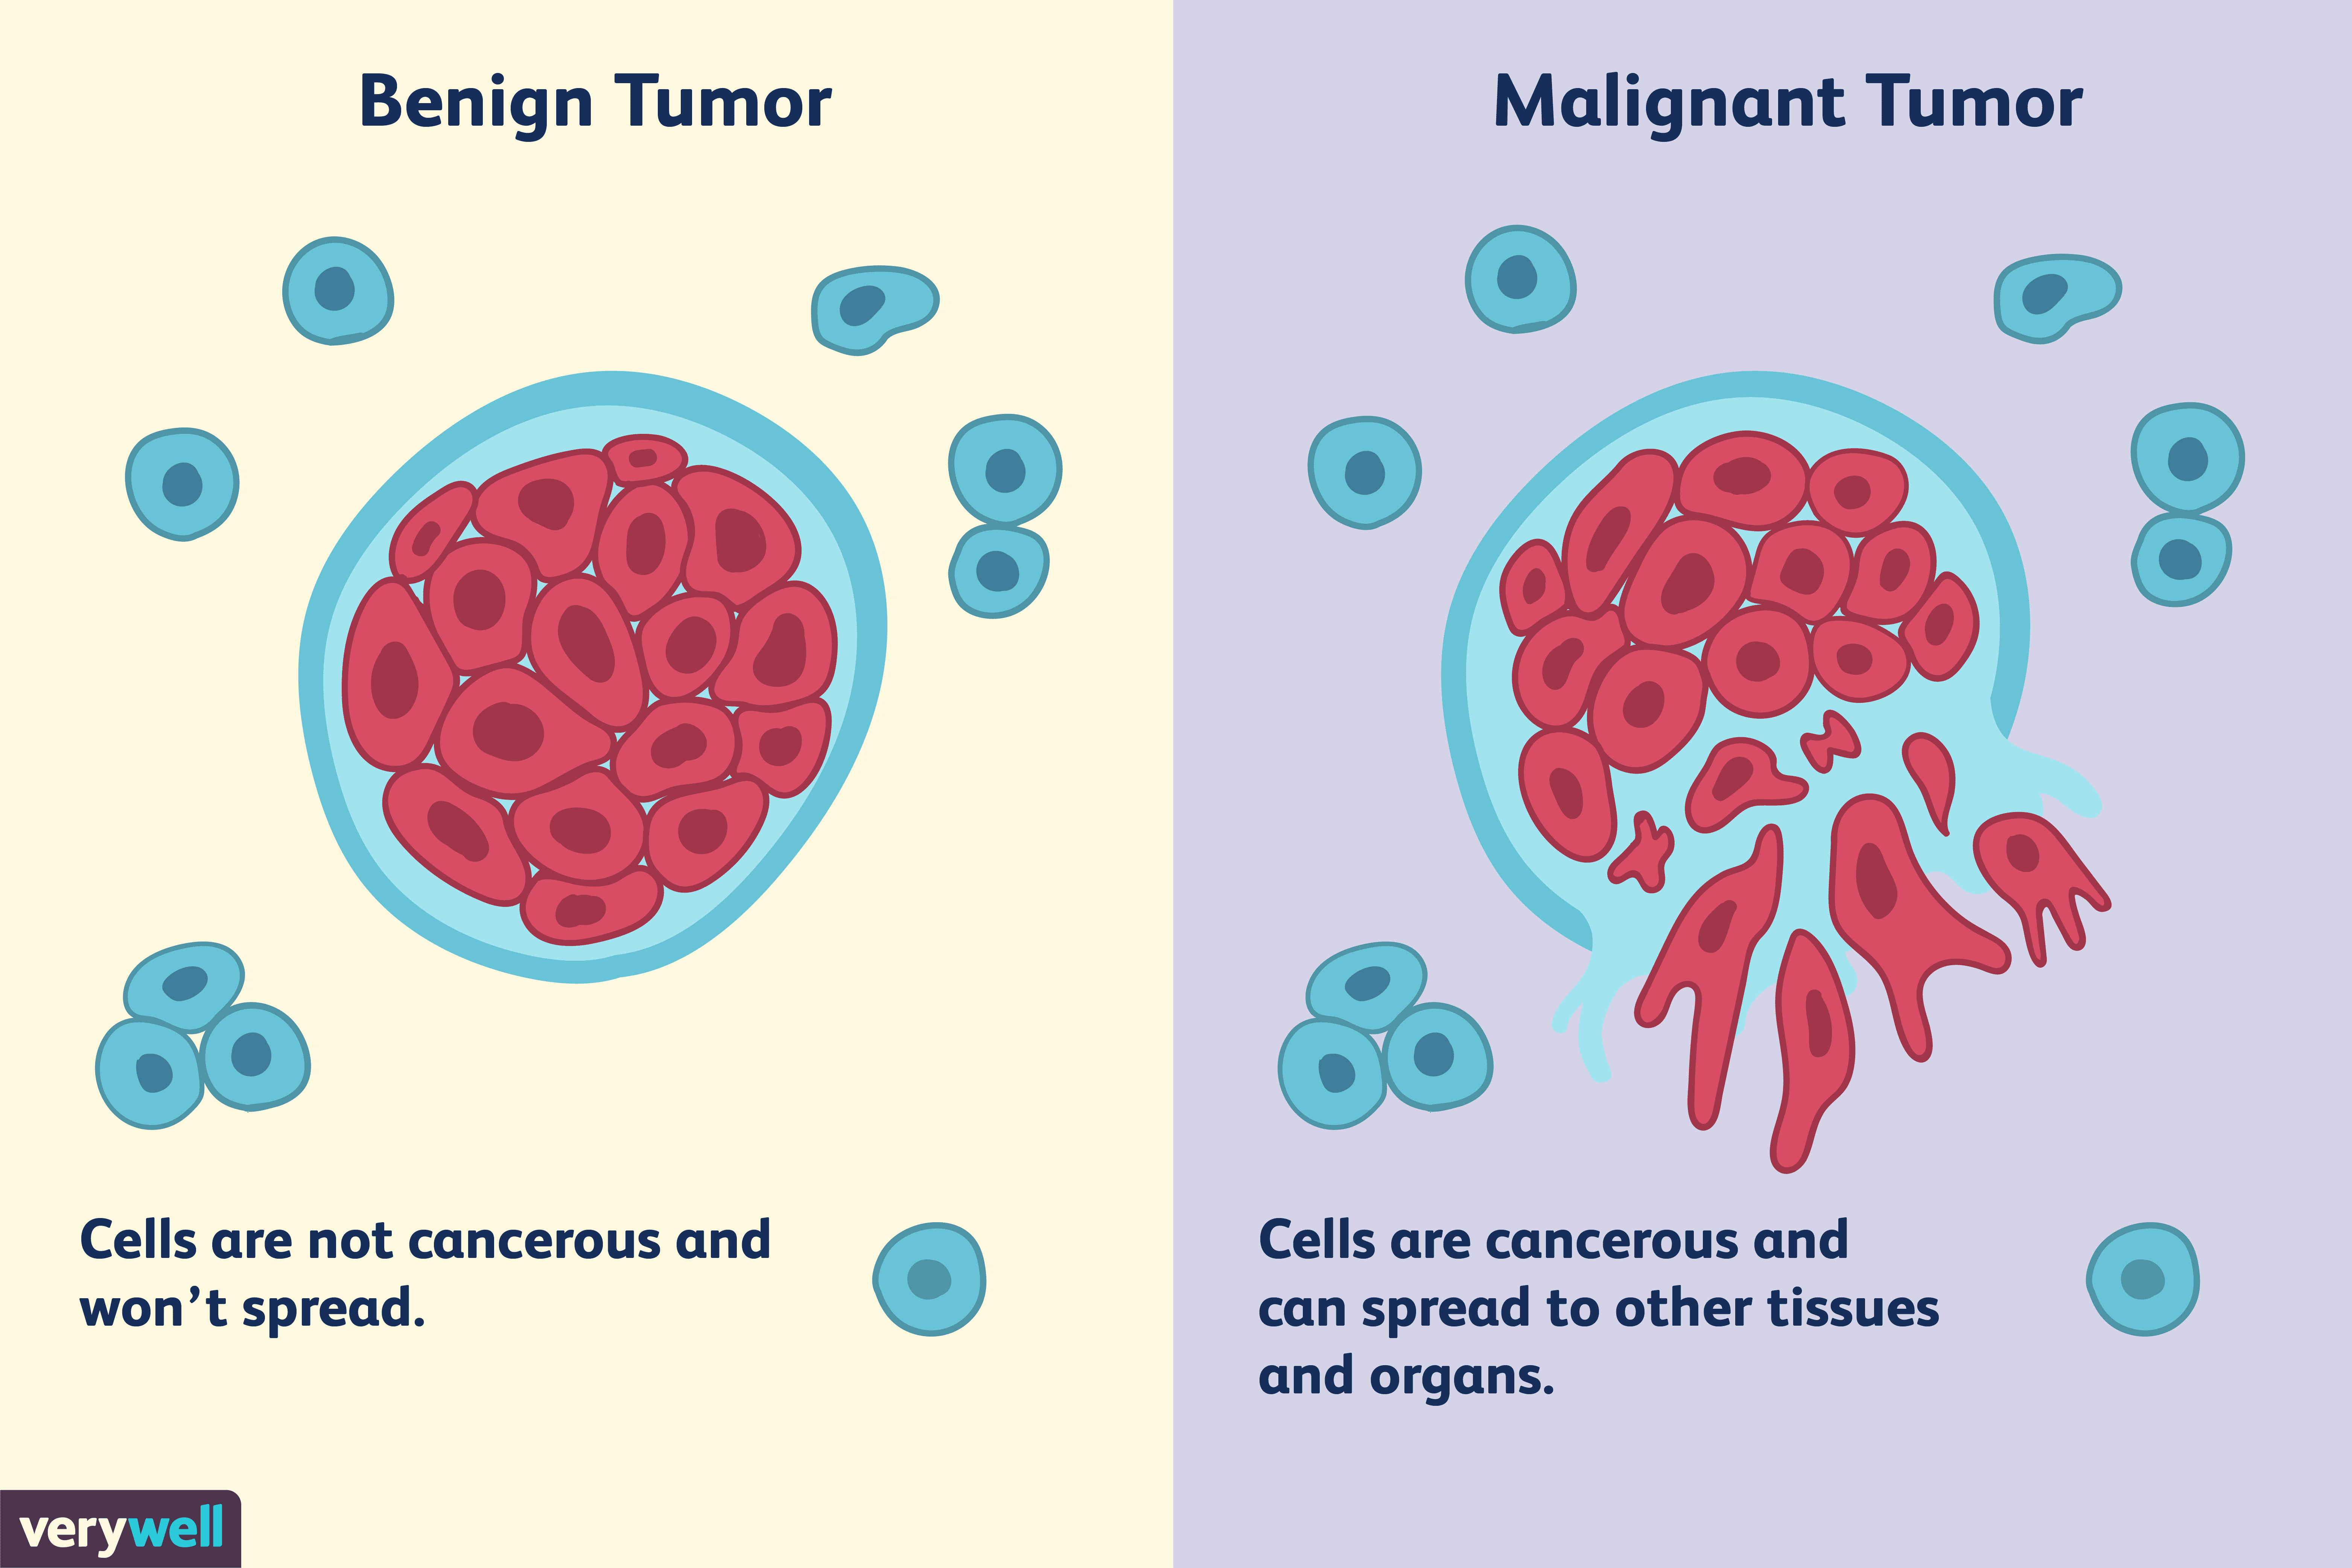

**INTRODUCTION**

In 2020, breast cancer caused 685,000 deaths globally. Approximately 2.3 million women were diagnosed with breast cancer in the same year. By the end of 2020, there were 7.8 million women alive who had been diagnosed with breast cancer in the past 5 years, making it the most prevalent cancer worldwide

Breast cancer is a disease in which abnormal breast cells grow out of control and form tumours. If left unchecked, the tumours can spread throughout the body and become fatal.

**SCOPE OF THE PROBLEM**

Breast cancer occurs in every country across the world. It affects women of all ages after puberty, with increasing rates in later life. Early detection and comprehensive treatment programs have improved survival rates since the 1990s.
The dataset will be tested using 5 machine learning models that deals with classification and regression problem.

**PROBLEM STATEMENT**

This project aims to build a macine learning model with comparison of several ones that preidct if the diagnosis based on the avialable dataset is Malignant or Beningn type of tumour

**Key Features Definition**
Breast cancer diagnostic data typically includes various features or attributes that describe characteristics of breast tumors. These, but not limited to features are crucial for building machine learning models to aid in breast cancer diagnosis.

Radius Mean: The mean of distances from the center to points on the perimeter of the tumor.

Texture Mean: A measure of variation in grayscale intensity levels in the image, reflecting how smooth or rough the tumor looks.

Perimeter Mean: The total length of the tumor's perimeter.

Area Mean: The total area enclosed by the tumor's perimeter.

Smoothness Mean: A measure of local variation in radius lengths.

Compactness Mean: A measure of how compact the shape of the tumor is, calculated as perimeter^2 / area - 1.0.

Concavity Mean: The severity of concave portions of the contour.

Concave Points Mean: The number of concave portions of the contour.

Symmetry Mean: A measure of symmetry of the tumor.

Fractal Dimension Mean: A measure of the complexity of the tumor's perimeter.

In [ ]:
#Importing necessary libraries to be used for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing necessary libraries to be used for Machine Learning analysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [ ]:
!pip install -q scikit-plot

In [ ]:
#Importing necessary libraries to be used for analysis and visualization
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from scikitplot.metrics import plot_confusion_matrix, plot_roc

from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

2024-03-10 12:26:12.708023: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 12:26:12.708154: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 12:26:12.870667: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**DATA PREPROCESSING**

In [ ]:
#Loading our dataset with a display of the first 5 rows
#Source: Kaggle
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast cancer dataset.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
#Display to get necessary information about the dataset as regards data types and check-in for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Description of our data with measures of central tendency
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [ ]:
#Display of the input features of the diagnosis column
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

**Insight**: It can be deduced that the number of people who have benign tumour are more than those who have Manignant. Manignant patients making 37% of patients

**DATA CLEANING**

In [ ]:
#Drop unneeded columns
df.drop("id",axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

**Insight**: It is observed that the column named 'id' is not by any chance needed for the data analysis; the column named Unnamed contains no vanlue(null) which results to dropping these two columns



In [ ]:
#Label Encoding for our target variable for easy data handling and analysis
df["diagnosis"]= df["diagnosis"].map({"M":1, "B":0})
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
#Defining target variable and explanatory variables
y = df["diagnosis"]
x = df.drop(['diagnosis'],axis=1)

In [ ]:
y.unique()
y.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [ ]:
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

**EXPLORATORY DATA ANALYSIS**

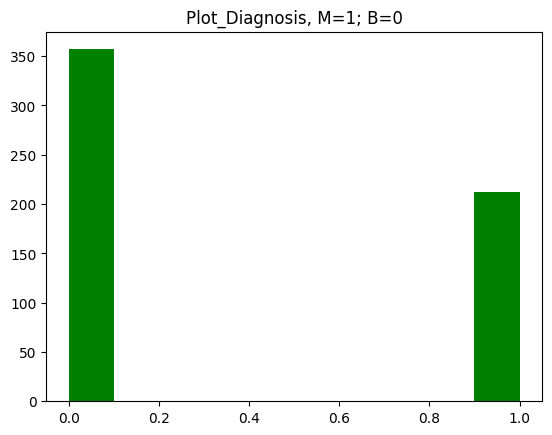

In [ ]:
#A histogram pictoral view of the distribution of tumour type

plt.hist(df["diagnosis"], color= "g")
plt.title("Plot_Diagnosis, M=1; B=0")
plt.show()

**Insight**:The figure above diagramatically shows the ratio of people that has malignant tumour to belign tumour

In [ ]:
df.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

<Axes: >

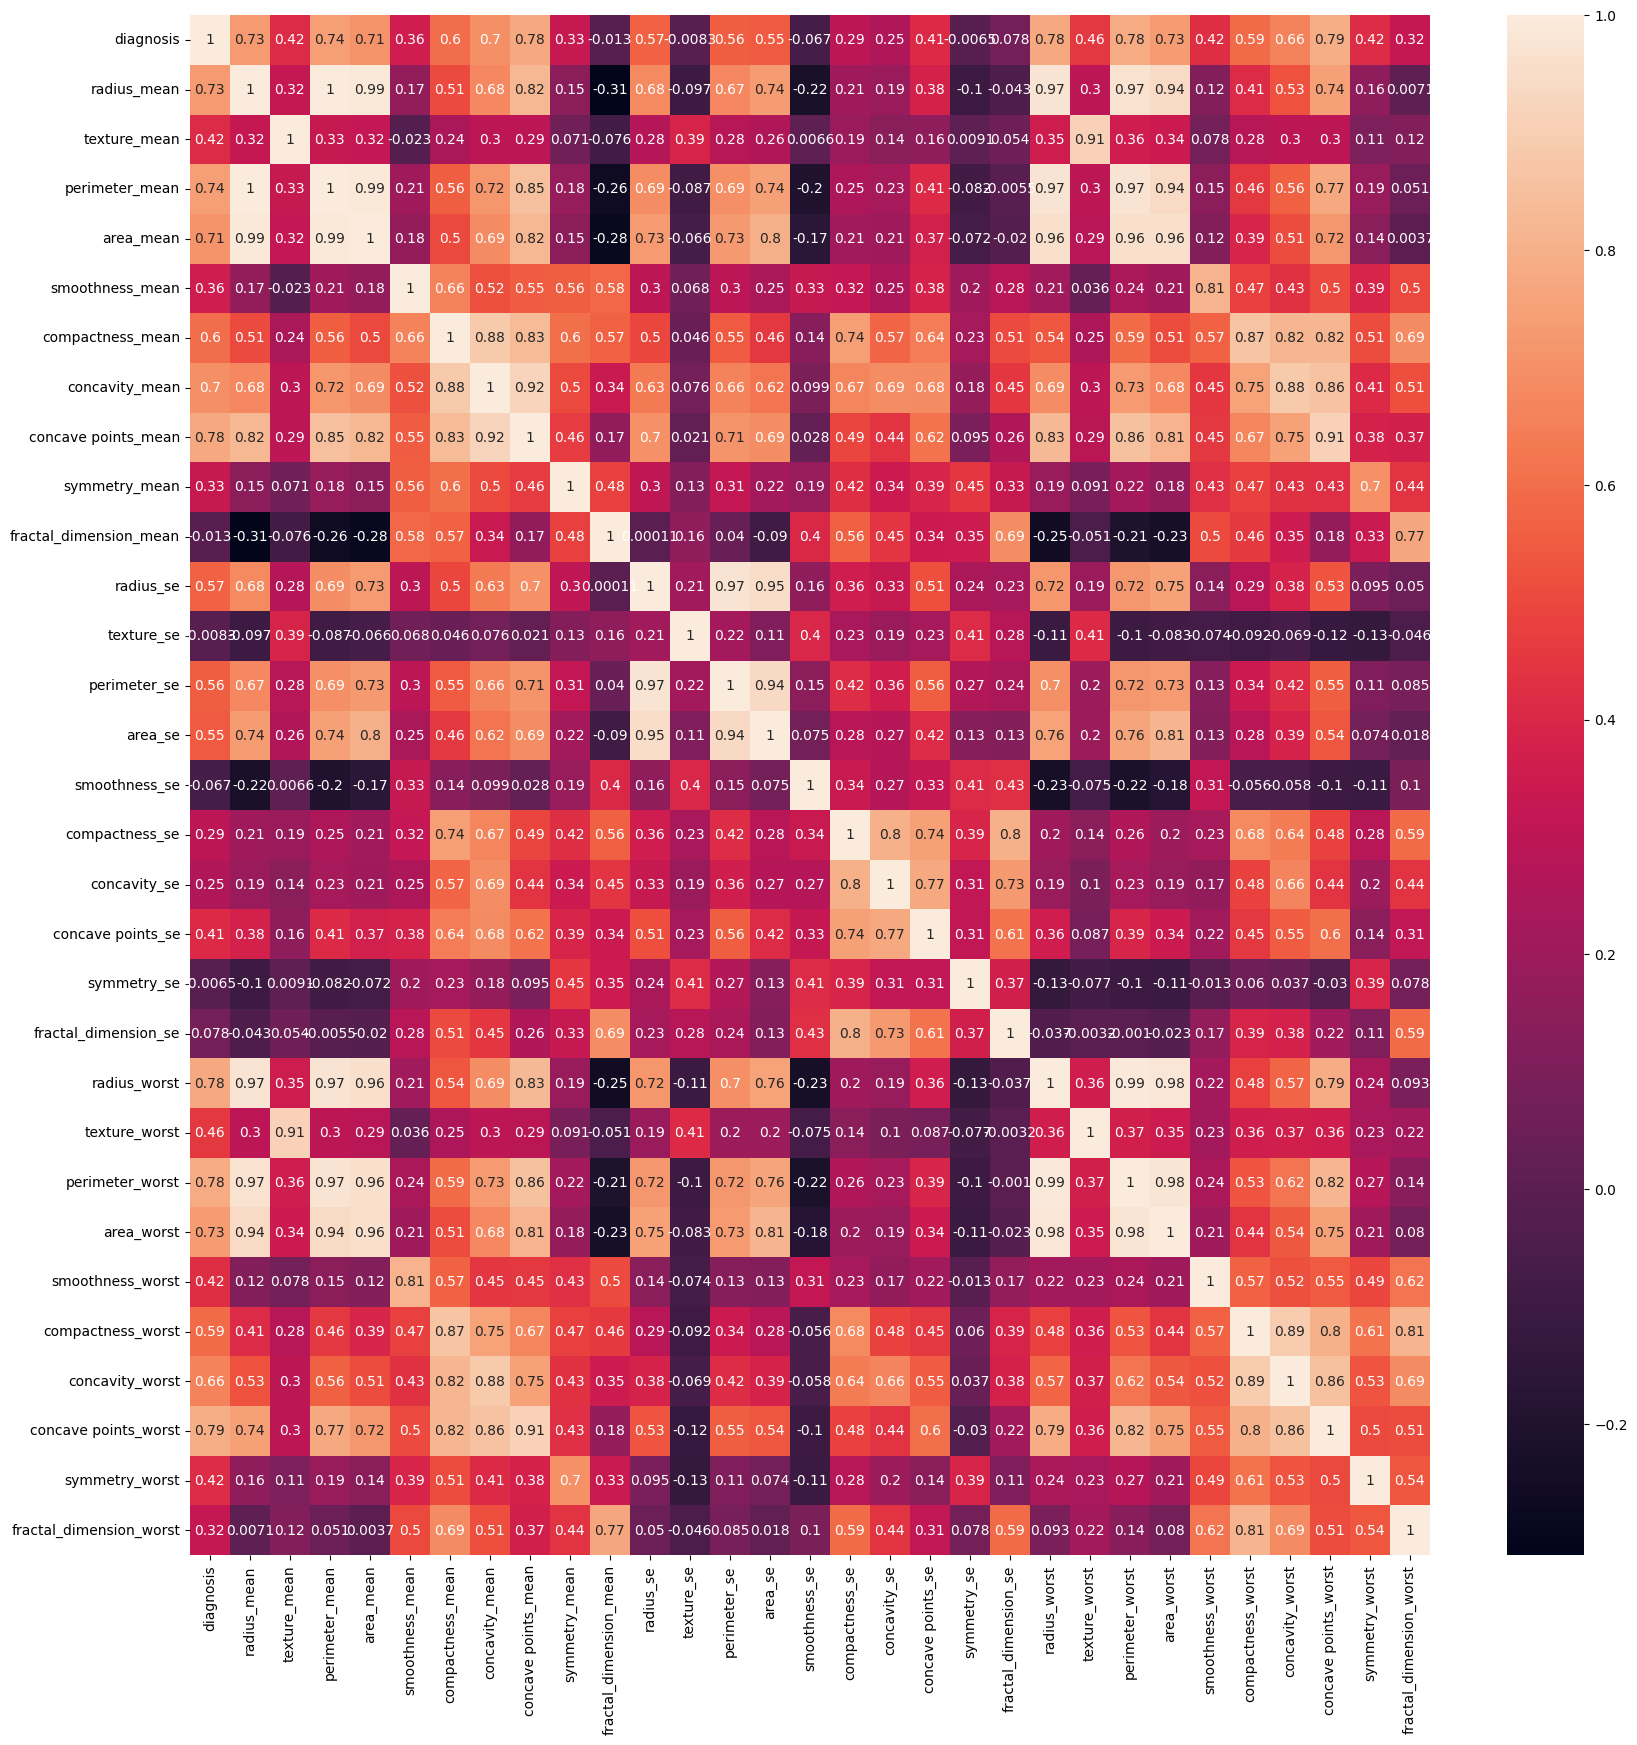

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the "diagnosis" column into integers
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])


df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
# Check class balance; used fr classification problem in ML
round(df["diagnosis"].value_counts(normalize=True), 2)

diagnosis
0    0.63
1    0.37
Name: proportion, dtype: float64

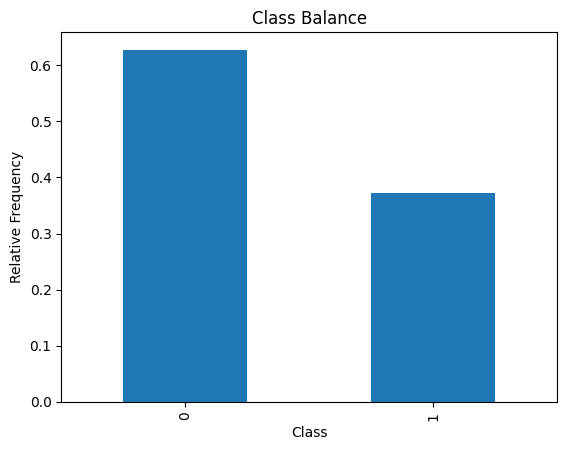

In [ ]:
# Plot class balance
df["diagnosis"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
)
plt.show()

**Visualizing some Features**

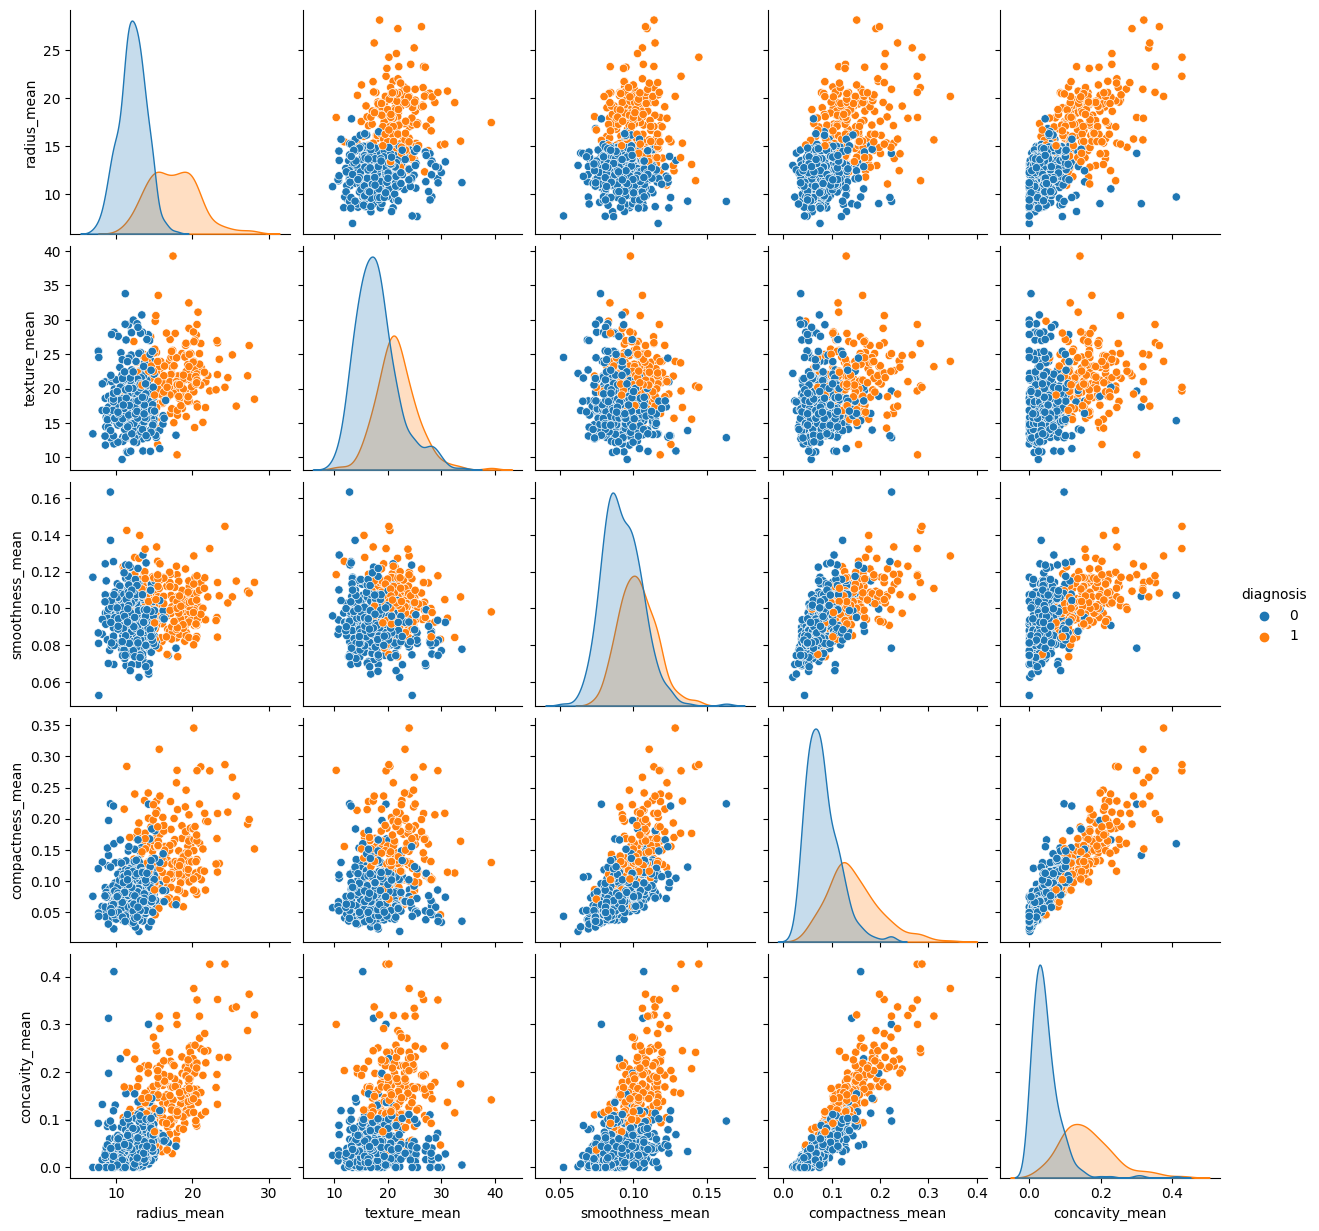

In [ ]:
sns.pairplot(df,hue='diagnosis',vars=['radius_mean','texture_mean','smoothness_mean','compactness_mean','concavity_mean'])

**Insight**: From the visualization,selected features does not directly impact the target variable(patient's tendency to have a cancrous tumour)

In [ ]:
def high_corr(data,threshold):
    highly_corr = []
    for i in range(len(data.corr().columns)):
        for j in range(i):
            if abs(data.corr().iloc[i,j]) > threshold:
                print(f'({data.corr().columns[i]},{data.corr().columns[j]}) : {data.corr().iloc[i,j]}')
                highly_corr.append((data.corr().columns[i],data.corr().columns[j]))
    return highly_corr

high_corr_list = high_corr(x,0.95)

(perimeter_mean,radius_mean) : 0.9978552814938109
(area_mean,radius_mean) : 0.9873571700566127
(area_mean,perimeter_mean) : 0.9865068039913907
(perimeter_se,radius_se) : 0.9727936770160764
(area_se,radius_se) : 0.951830112110991
(radius_worst,radius_mean) : 0.9695389726112055
(radius_worst,perimeter_mean) : 0.9694763634663146
(radius_worst,area_mean) : 0.9627460860470841
(perimeter_worst,radius_mean) : 0.9651365139559871
(perimeter_worst,perimeter_mean) : 0.9703868870426394
(perimeter_worst,area_mean) : 0.9591195743552645
(perimeter_worst,radius_worst) : 0.993707916102949
(area_worst,area_mean) : 0.9592133256498998
(area_worst,radius_worst) : 0.9840145644590742
(area_worst,perimeter_worst) : 0.9775780914063871


**SPLITING THE DATASET INTO TEST AND TRAIN SET**

In [ ]:
x= StandardScaler().fit_transform(x)

In [ ]:
x_,x_test,y_,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_,y_,test_size=0.3,random_state=42)
print(x_train.shape,x_val.shape,x_test.shape)

(318, 30) (137, 30) (114, 30)


**Justification for Using Logistic Regression**
The target variable is binary(i.e; diagnosis= 0/1)a ansd Loistics Regression is excellent for binary classification

In [ ]:
#LogisticRegression
model = LogisticRegression().fit(x_train,y_train)
y_pred = model.predict(x_val)
predection = model.predict(x_test)
print(f'Val Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, predection)}')

Val Accuracy: 0.9708029197080292
Test Accuracy: 0.9824561403508771


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



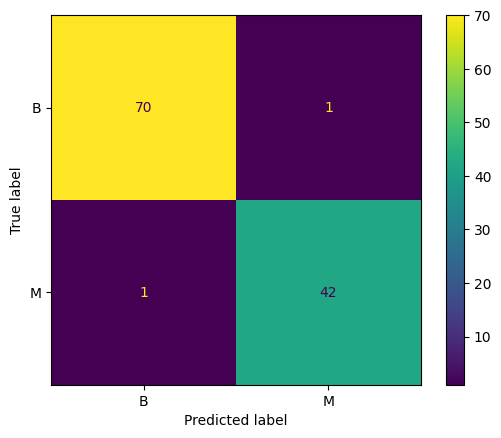

In [ ]:
print(classification_report(y_test,predection))
cm = confusion_matrix(y_test,predection)
ConfusionMatrixDisplay(cm,display_labels=['B','M']).plot()

**Insight**: Logistic Regression model has an accuracy  of 98%

In [ ]:
#Easy Hypertuning using Girdsearch
def grid_search(model,params,X_train,y_train):
    grid = GridSearchCV(model,params,scoring='f1')
    grid.fit(X_train,y_train)
    return grid.best_params_

In [ ]:
#KNN

from sklearn.model_selection import train_test_split,GridSearchCV
model = KNeighborsClassifier()
params = {'n_neighbors':range(1,10),'weights':['uniform','distance']}
best = grid_search(model,params,x_train,y_train)
best


{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
model = KNeighborsClassifier(n_neighbors=best['n_neighbors'],weights=best['weights']).fit(x_train,y_train)
y_pred = model.predict(x_val)
predection = model.predict(x_test)
print(f'Val Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, predection)}')

Val Accuracy: 0.9781021897810219
Test Accuracy: 0.9473684210526315


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



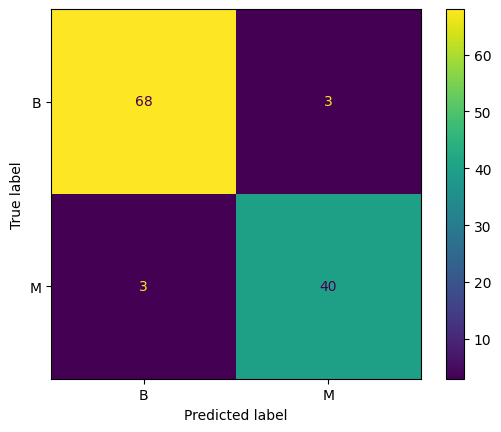

In [ ]:
print(classification_report(y_test,predection))
cm = confusion_matrix(y_test,predection)
ConfusionMatrixDisplay(cm,display_labels=['B','M']).plot()

**Insight**: KNN model has an accuracy  of 95%

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
params = {'max_depth':[2,4,10,30,100], 'min_samples_split':[2,5,10,20,50], 'n_estimators':[10,50,100,200]}
best = grid_search(model,params,x_train,y_train)
best

{'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 50}

In [ ]:
model = RandomForestClassifier(max_depth=best['max_depth'],min_samples_split=best['min_samples_split'],n_estimators=best['n_estimators']).fit(x_train,y_train)
y_pred = model.predict(x_val)
predection = model.predict(x_test)
print(f'Val Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, predection)}')

Val Accuracy: 0.948905109489051
Test Accuracy: 0.9649122807017544


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



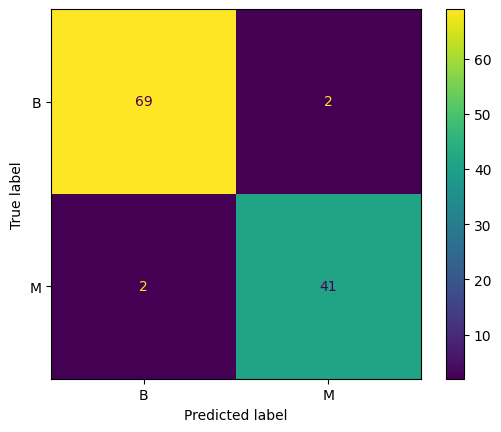

In [ ]:
print(classification_report(y_test,predection))
cm = confusion_matrix(y_test,predection)
ConfusionMatrixDisplay(cm,display_labels=['B','M']).plot()

**Insight**: RandomForest model has an accuracy  of 96%

In [ ]:
#XGBOOST
from xgboost import XGBClassifier
model = XGBClassifier()
params = {'n_estimators':[10,50,100,200],'learning_rate':[0.01,0.1,0.3,0.5],'max_depth':[2,4,10,30,100]}
best = grid_search(model,params,x_train,y_train)
best

{'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 50}

In [ ]:
model = XGBClassifier(n_estimators = best['n_estimators'], learning_rate = best['learning_rate'],max_depth=best['max_depth']).fit(x_train,y_train)
y_pred = model.predict(x_val)
predection = model.predict(x_test)
print(f'Val Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, predection)}')

Val Accuracy: 0.948905109489051
Test Accuracy: 0.956140350877193


              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



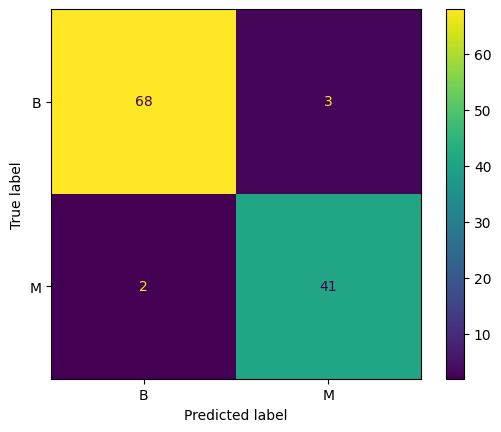

In [ ]:
print(classification_report(y_test,predection))
cm = confusion_matrix(y_test,predection)
ConfusionMatrixDisplay(cm,display_labels=['B','M']).plot()

**Insight**: XGBOOST model has an accuracy  of 96%

In [ ]:
#LGBM
from lightgbm import LGBMClassifier
model = LGBMClassifier()
params = {'n_estimators':[10,50,100],'learning_rate':[0.01,0.1,0.001],'max_depth':[2,4,10]}
best = grid_search(model,params,x_train,y_train)
best

[LightGBM] [Info] Number of positive: 96, number of negative: 158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2548
[LightGBM] [Info] Number of data points in the train set: 254, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377953 -> initscore=-0.498247
[LightGBM] [Info] Start training from score -0.498247
[LightGBM] [Info] Number of positive: 96, number of negative: 158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2539
[LightGBM] [Info] Number of data points in the train set: 254, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377953 -> initscore=-0.498247
[LightGBM] [Info] Start training from score -0.498247
[LightGBM] [Info] Number o

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

In [ ]:
model = LGBMClassifier(n_estimators = best['n_estimators'], learning_rate = best['learning_rate'],max_depth=best['max_depth']).fit(x_train,y_train)
y_pred = model.predict(x_val)
predection = model.predict(x_test)
print(f'Val Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, predection)}')

[LightGBM] [Info] Number of positive: 120, number of negative: 198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3188
[LightGBM] [Info] Number of data points in the train set: 318, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377358 -> initscore=-0.500775
[LightGBM] [Info] Start training from score -0.500775
Val Accuracy: 0.9562043795620438
Test Accuracy: 0.9649122807017544


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



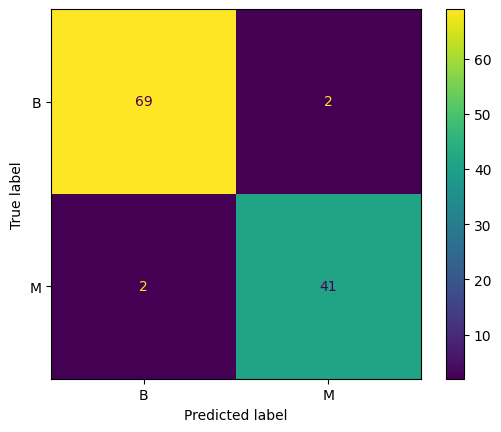

In [ ]:
print(classification_report(y_test,predection))
cm = confusion_matrix(y_test,predection)
ConfusionMatrixDisplay(cm,display_labels=['B','M']).plot()

**Insight**: LGBM model has an accuracy  of 96%

Summary Statistics
Logistic Regression-98%

RandomForest- 96%

kNN-96%

XGBOOST-96%

LGBM-96%

**Summary**: From the machine learninig models applied to the dataset, it demonstrates that Logistic Rergression gives the highest accuracy and is the best to predict whether the tumour is malignant or belign.

**Recommendation**: The reliability of the model in combination with insights from medical practitioners can be applied for early diagnosis of  breast cancer to improve patient outcome